In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [2]:
#understanding the dataset
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#access the data attributes
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index, name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [4]:
#reshaping data
dt = dataset[:, 12].reshape(-1, 1)

In [5]:
#shape of data
np.shape(dataset)

(506, 13)

In [10]:
#target values
tgt = boston.target.reshape(-1, 1)

In [11]:
#Shape of target
np.shape(tgt)

(506, 1)

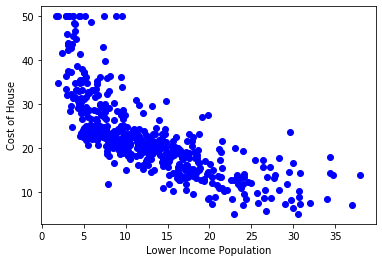

In [15]:
#Ensure that matplotlib is working 
%matplotlib inline
plt.scatter(dt, tgt, color='blue')
plt.xlabel('Lower Income Population')
plt.ylabel('Cost of House')
plt.show()

In [16]:
#Regression
from sklearn.linear_model import LinearRegression
#Create a regression model
reg = LinearRegression()
#Fit the model
reg.fit(dt, tgt)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Prediction
pred = reg.predict(dt)

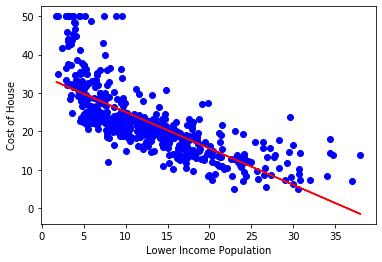

In [18]:
#Ensure that matplotlib is working 
%matplotlib inline
plt.scatter(dt, tgt, color='blue')
plt.plot(dt, pred, color='red')
plt.xlabel('Lower Income Population')
plt.ylabel('Cost of House')
plt.show()

In [19]:
#Circumventing curve issue using polynomial model
from sklearn.preprocessing import PolynomialFeatures
#To allow merging of models
from sklearn.pipeline import make_pipeline
#Make pipeline
model = make_pipeline(PolynomialFeatures(3), reg)
model.fit(dt, tgt)
pred = model.predict(dt)


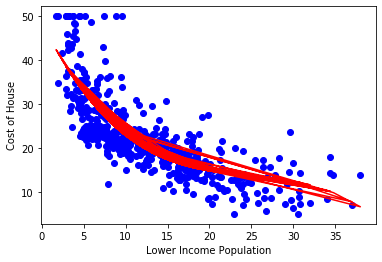

In [20]:
#Ensure that matplotlib is working 
%matplotlib inline
plt.scatter(dt, tgt, color='blue')
plt.plot(dt, pred, color='red')
plt.xlabel('Lower Income Population')
plt.ylabel('Cost of House')
plt.show()

In [21]:
#R_2 metric to judge the performance of model
from sklearn.metrics import r2_score
#Predict
r2_score(pred, tgt)

0.47989118102755746

In [22]:
#Trying with another variable i.e., per capita crime rate by town 
#reshaping data
dt = dataset[:, 0].reshape(-1, 1)

In [23]:
#shape of data
np.shape(dataset)
#target values
tgt = boston.target.reshape(-1, 1)
#Shape of target
np.shape(tgt)

(506, 1)

In [24]:
#shape of data
np.shape(dataset)

(506, 13)

In [25]:
#Regression
from sklearn.linear_model import LinearRegression
#Create a regression model
reg = LinearRegression()
#Fit the model
reg.fit(dt, tgt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#Prediction
pred = reg.predict(dt)

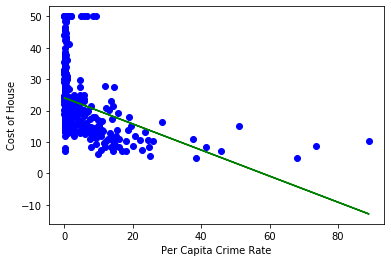

In [27]:
#Ensure that matplotlib is working 
%matplotlib inline
plt.scatter(dt, tgt, color='blue')
plt.plot(dt, pred, color='green')
plt.xlabel('Per Capita Crime Rate')
plt.ylabel('Cost of House')
plt.show()

In [28]:
#Circumventing curve issue using polynomial model
from sklearn.preprocessing import PolynomialFeatures
#To allow merging of models
from sklearn.pipeline import make_pipeline
#Make pipeline
model = make_pipeline(PolynomialFeatures(3), reg)
model.fit(dt, tgt)
pred = model.predict(dt)


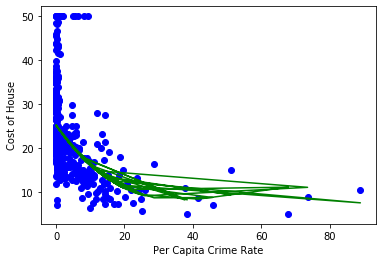

In [29]:
#Ensure that matplotlib is working 
%matplotlib inline
plt.scatter(dt, tgt, color='blue')
plt.plot(dt, pred, color='green')
plt.xlabel('Per Capita Crime Rate')
plt.ylabel('Cost of House')
plt.show()

In [30]:
#Trying with different model  and variable i.e., Lasso and average number of rooms per dwelling
#reshaping data
dt = dataset[:, 5].reshape(-1, 1)
#shape of data
np.shape(dataset)

(506, 13)

In [31]:
#target values
tgt = boston.target.reshape(-1, 1)

In [32]:
#Shape of target
np.shape(tgt)

(506, 1)

In [33]:
#Regression
from sklearn.linear_model import Lasso
#Create a regression model
reg = Lasso()
#Fit the model
reg.fit(dt, tgt)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
#Prediction
pred = reg.predict(dt)

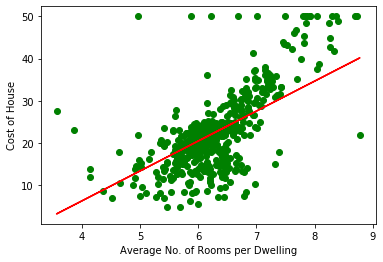

In [35]:
#Ensure that matplotlib is working 
%matplotlib inline
plt.scatter(dt, tgt, color='green')
plt.plot(dt, pred, color='red')
plt.xlabel('Average No. of Rooms per Dwelling')
plt.ylabel('Cost of House')
plt.show()